<a href="https://colab.research.google.com/github/jyothishri184/Market-basket-Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MARKET BASKET ANAYSIS


#DATA LOADING

In [ ]:
!pip install pyspark

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MarketBasketAnalysis").getOrCreate()

In [ ]:
df_1 = spark.read.csv("/content/2010-2011-1.csv",header=True,inferSchema=True)
df_2 = spark.read.csv("/content/2009-2010-1.csv",header=True,inferSchema=True)

In [ ]:
df_1.show()

+-------+---------+--------------------+--------+----------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|     InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+----------------+-----+-----------+--------------+
| 536365|   85123A|WHITE HANGING HEA...|       6|01-12-2010 08:26| 2.55|      17850|United Kingdom|
| 536365|    71053| WHITE METAL LANTERN|       6|01-12-2010 08:26| 3.39|      17850|United Kingdom|
| 536365|   84406B|CREAM CUPID HEART...|       8|01-12-2010 08:26| 2.75|      17850|United Kingdom|
| 536365|   84029G|KNITTED UNION FLA...|       6|01-12-2010 08:26| 3.39|      17850|United Kingdom|
| 536365|   84029E|RED WOOLLY HOTTIE...|       6|01-12-2010 08:26| 3.39|      17850|United Kingdom|
| 536365|    22752|SET 7 BABUSHKA NE...|       2|01-12-2010 08:26| 7.65|      17850|United Kingdom|
| 536365|    21730|GLASS STAR FROSTE...|       6|01-12-2010 08:26| 4.25|      17850|United Kingdom|


In [ ]:
df_2.show()

+-------+---------+--------------------+--------+----------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|     InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+----------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|01-12-2009 07:45| 6.95|      13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|01-12-2009 07:45| 6.75|      13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|01-12-2009 07:45| 6.75|      13085|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|01-12-2009 07:45|  2.1|      13085|United Kingdom|
| 489434|    21232|STRAWBERRY CERAMI...|      24|01-12-2009 07:45| 1.25|      13085|United Kingdom|
| 489434|    22064|PINK DOUGHNUT TRI...|      24|01-12-2009 07:45| 1.65|      13085|United Kingdom|
| 489434|    21871| SAVE THE PLANET MUG|      24|01-12-2009 07:45| 1.25|      13085|United Kingdom|


#PREPROCESSING  


DATA EXPLORATION

In [ ]:
df_1.describe().show()

+-------+------------------+------------------+--------------------+------------------+----------------+-----------------+------------------+-----------+
|summary|           Invoice|         StockCode|         Description|          Quantity|     InvoiceDate|            Price|       Customer ID|    Country|
+-------+------------------+------------------+--------------------+------------------+----------------+-----------------+------------------+-----------+
|  count|            541910|            541910|              540456|            541910|          541910|           541910|            406830|     541910|
|   mean| 559965.7926209917|27623.240210938104|             20713.0| 9.552233765754462|            NULL|4.611138332927965|15287.684160460143|       NULL|
| stddev|13428.437355340984| 16799.73762842774|                NULL|218.08095694392543|            NULL|96.75976549366548|1713.6030743514768|       NULL|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|        

In [ ]:
df_2.describe().show()

+-------+------------------+-----------------+--------------------+------------------+----------------+-----------------+------------------+-----------+
|summary|           Invoice|        StockCode|         Description|          Quantity|     InvoiceDate|            Price|       Customer ID|    Country|
+-------+------------------+-----------------+--------------------+------------------+----------------+-----------------+------------------+-----------+
|  count|            525461|           525461|              522533|            525461|          525461|           525461|            417534|     525461|
|   mean| 514496.9241788484|30518.37992495103|  22226.666666666668|10.337667305470815|            NULL| 4.68883447867188|15360.645477973052|       NULL|
| stddev|14439.209494472732|20693.16815285475|   646.8974674037095|107.42411026879805|            NULL|146.1269139529275|1680.8113157457294|       NULL|
|    min|            489434|            10002|  DOORMAT UNION J...|             -9

In [ ]:
df_1.dtypes

[('Invoice', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('Price', 'double'),
 ('Customer ID', 'int'),
 ('Country', 'string')]

In [ ]:
df_2.dtypes

[('Invoice', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('Price', 'double'),
 ('Customer ID', 'int'),
 ('Country', 'string')]

Attribute Information:

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.


StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.


Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.


UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).


CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.


Country: Country name. Nominal. The name of the country where a customer resides.

COLUMN RENAME

In [ ]:
df_1.columns

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [ ]:
df_2.columns

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

In [ ]:
df_1 = df_1.withColumnRenamed("Invoice","transaction_id")
df_1 = df_1.withColumnRenamed("StockCode","product_id")
df_1 = df_1.withColumnRenamed("Description","product_name")
df_1 = df_1.withColumnRenamed("Quantity","quantity")
df_1 = df_1.withColumnRenamed("InvoiceDate","transaction_date")
df_1 = df_1.withColumnRenamed("Price","price")
df_1 = df_1.withColumnRenamed("Customer ID","customer_id")
df_1 = df_1.withColumnRenamed("Country","country")

In [ ]:
df_1.columns

['transaction_id',
 'product_id',
 'product_name',
 'quantity',
 'transaction_date',
 'price',
 'customer_id',
 'country']

In [ ]:
df_2 = df_2.withColumnRenamed("Invoice","transaction_id")
df_2 = df_2.withColumnRenamed("StockCode","product_id")
df_2 = df_2.withColumnRenamed("Description","product_name")
df_2 = df_2.withColumnRenamed("Quantity","quantity")
df_2 = df_2.withColumnRenamed("InvoiceDate","transaction_date")
df_2 = df_2.withColumnRenamed("Price","price")
df_2 = df_2.withColumnRenamed("Customer ID","customer_id")
df_2 = df_2.withColumnRenamed("Country","country")

In [ ]:
df_2.columns

['transaction_id',
 'product_id',
 'product_name',
 'quantity',
 'transaction_date',
 'price',
 'customer_id',
 'country']

DEALING WITH NULL VALUES

In [ ]:
print((df_1.count(), len(df_1.columns)))

(541910, 8)


In [ ]:
df_1 = df_1.dropna()

In [ ]:
print((df_1.count(), len(df_1.columns)))

(406830, 8)


In [ ]:
print((df_2.count(), len(df_2.columns)))

(525461, 8)


In [ ]:
df_2 = df_2.dropna()

In [ ]:
print((df_2.count(), len(df_2.columns)))

(417534, 8)


REMOVING DUPLICATES


In [ ]:
print((df_1.count(), len(df_1.columns)))

(406830, 8)


In [ ]:
df_1 = df_1.dropDuplicates()

In [ ]:
print((df_1.count(), len(df_1.columns)))

(401605, 8)


In [ ]:
print((df_2.count(), len(df_2.columns)))

(417534, 8)


In [ ]:
df_2 = df_2.dropDuplicates()

In [ ]:
print((df_2.count(), len(df_2.columns)))

(410763, 8)


IN Column 'Transation id' removing rows staring with 'C' SINCE they are cancelled order

In [ ]:
from pyspark.sql.functions import col

In [ ]:
df_1 = df_1.filter(~col("transaction_id").startswith("C"))
df_1.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536381|     22411|JUMBO SHOPPER VIN...|      10|01-12-2010 09:41| 1.95|      15311|United Kingdom|
|        536392|     22827|RUSTIC  SEVENTEEN...|       1|01-12-2010 10:29|165.0|      13705|United Kingdom|
|        536401|     21592|RETROSPOT CIGAR B...|       1|01-12-2010 11:21| 1.25|      15862|United Kingdom|
|        536464|     22988|   SOLDIERS EGG CUP |       1|01-12-2010 12:23| 1.25|      17968|United Kingdom|
|        536464|     22910|PAPER CHAIN KIT V...|       1|01-12-2010 12:23| 2.95|      17968|United Kingdom|
|        536488|     20878|SET/9 CHRISTMAS T...|       2|01-12-2010 12:31| 1.25|      17897|United Kingdom|
|        536500|     22712| 

In [ ]:
print((df_1.count(), len(df_1.columns)))

(392733, 8)


In [ ]:
df_2 = df_2.filter(~col("transaction_id").startswith("C"))
df_2.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        489436|     21756|BATH BUILDING BLO...|       3|01-12-2009 09:06| 5.95|      13078|United Kingdom|
|        489438|    84519A|TOMATO CHARLIE+LO...|      56|01-12-2009 09:24| 2.15|      18102|United Kingdom|
|        489446|     22199|FRYING PAN RED PO...|       4|01-12-2009 10:06| 4.25|      13758|United Kingdom|
|        489520|     22083|PAPER CHAIN KIT R...|       6|01-12-2009 11:41| 2.95|      14911|          EIRE|
|        489522|     21133|PAINTED BIRD ASSO...|       6|01-12-2009 11:45| 1.69|      15998|United Kingdom|
|        489529|     21500|   PINK SPOTS  WRAP |      25|01-12-2009 11:51| 0.42|      17984|United Kingdom|
|        489545|     22113|G

In [ ]:
print((df_2.count(), len(df_2.columns)))

(400947, 8)


converting column 'TRANSACTION_ID' to INT

In [ ]:
df_1 = df_1.withColumn("transaction_id", df_1["transaction_id"].cast("int"))
df_1.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536381|     22411|JUMBO SHOPPER VIN...|      10|01-12-2010 09:41| 1.95|      15311|United Kingdom|
|        536392|     22827|RUSTIC  SEVENTEEN...|       1|01-12-2010 10:29|165.0|      13705|United Kingdom|
|        536401|     21592|RETROSPOT CIGAR B...|       1|01-12-2010 11:21| 1.25|      15862|United Kingdom|
|        536464|     22988|   SOLDIERS EGG CUP |       1|01-12-2010 12:23| 1.25|      17968|United Kingdom|
|        536464|     22910|PAPER CHAIN KIT V...|       1|01-12-2010 12:23| 2.95|      17968|United Kingdom|
|        536488|     20878|SET/9 CHRISTMAS T...|       2|01-12-2010 12:31| 1.25|      17897|United Kingdom|
|        536500|     22712| 

In [ ]:
df_1.dtypes

[('transaction_id', 'int'),
 ('product_id', 'string'),
 ('product_name', 'string'),
 ('quantity', 'int'),
 ('transaction_date', 'string'),
 ('price', 'double'),
 ('customer_id', 'int'),
 ('country', 'string')]

In [ ]:
df_2 = df_2.withColumn("transaction_id", df_2["transaction_id"].cast("int"))
df_2.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        489436|     21756|BATH BUILDING BLO...|       3|01-12-2009 09:06| 5.95|      13078|United Kingdom|
|        489438|    84519A|TOMATO CHARLIE+LO...|      56|01-12-2009 09:24| 2.15|      18102|United Kingdom|
|        489446|     22199|FRYING PAN RED PO...|       4|01-12-2009 10:06| 4.25|      13758|United Kingdom|
|        489520|     22083|PAPER CHAIN KIT R...|       6|01-12-2009 11:41| 2.95|      14911|          EIRE|
|        489522|     21133|PAINTED BIRD ASSO...|       6|01-12-2009 11:45| 1.69|      15998|United Kingdom|
|        489529|     21500|   PINK SPOTS  WRAP |      25|01-12-2009 11:51| 0.42|      17984|United Kingdom|
|        489545|     22113|G

In [ ]:
df_2.dtypes

[('transaction_id', 'int'),
 ('product_id', 'string'),
 ('product_name', 'string'),
 ('quantity', 'int'),
 ('transaction_date', 'string'),
 ('price', 'double'),
 ('customer_id', 'int'),
 ('country', 'string')]

Spliting 'transaction_date' column to 'transaction_date' and 'transaction_time'

In [ ]:
df_1 = df_1
df_2 = df_2

In [ ]:
df_1.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536381|     22411|JUMBO SHOPPER VIN...|      10|01-12-2010 09:41| 1.95|      15311|United Kingdom|
|        536392|     22827|RUSTIC  SEVENTEEN...|       1|01-12-2010 10:29|165.0|      13705|United Kingdom|
|        536401|     21592|RETROSPOT CIGAR B...|       1|01-12-2010 11:21| 1.25|      15862|United Kingdom|
|        536464|     22988|   SOLDIERS EGG CUP |       1|01-12-2010 12:23| 1.25|      17968|United Kingdom|
|        536464|     22910|PAPER CHAIN KIT V...|       1|01-12-2010 12:23| 2.95|      17968|United Kingdom|
|        536488|     20878|SET/9 CHRISTMAS T...|       2|01-12-2010 12:31| 1.25|      17897|United Kingdom|
|        536500|     22712| 

In [ ]:
df_1.dtypes

[('transaction_id', 'int'),
 ('product_id', 'string'),
 ('product_name', 'string'),
 ('quantity', 'int'),
 ('transaction_date', 'string'),
 ('price', 'double'),
 ('customer_id', 'int'),
 ('country', 'string')]

In [ ]:
from pyspark.sql.functions import substring,to_date

df_1 = df_1.withColumn('transaction_date', to_date(substring(df_1['transaction_date'], 1, 10), 'dd-MM-yyyy'))

df_1.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536381|     22411|JUMBO SHOPPER VIN...|      10|      2010-12-01| 1.95|      15311|United Kingdom|
|        536392|     22827|RUSTIC  SEVENTEEN...|       1|      2010-12-01|165.0|      13705|United Kingdom|
|        536401|     21592|RETROSPOT CIGAR B...|       1|      2010-12-01| 1.25|      15862|United Kingdom|
|        536464|     22988|   SOLDIERS EGG CUP |       1|      2010-12-01| 1.25|      17968|United Kingdom|
|        536464|     22910|PAPER CHAIN KIT V...|       1|      2010-12-01| 2.95|      17968|United Kingdom|
|        536488|     20878|SET/9 CHRISTMAS T...|       2|      2010-12-01| 1.25|      17897|United Kingdom|
|        536500|     22712| 

In [ ]:
df_1.dtypes

[('transaction_id', 'int'),
 ('product_id', 'string'),
 ('product_name', 'string'),
 ('quantity', 'int'),
 ('transaction_date', 'date'),
 ('price', 'double'),
 ('customer_id', 'int'),
 ('country', 'string')]

In [ ]:
import os
pandas_df = df_1.toPandas()

# Specify the local directory where you want to save the CSV file
local_directory = "C:/Users/jyoth/Downloads/BDA PROJ/mydata"

# Ensure the directory exists or create it if it doesn't
os.makedirs(local_directory, exist_ok=True)

# Specify the file name within the directory
file_name = "local_output.csv"

# Combine the directory and file name
local_file_path = os.path.join(local_directory, file_name)

# Use Pandas to save the DataFrame as a CSV file locally
pandas_df.to_csv(local_file_path, index=False)

In [ ]:
df_2.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        489436|     21756|BATH BUILDING BLO...|       3|01-12-2009 09:06| 5.95|      13078|United Kingdom|
|        489438|    84519A|TOMATO CHARLIE+LO...|      56|01-12-2009 09:24| 2.15|      18102|United Kingdom|
|        489446|     22199|FRYING PAN RED PO...|       4|01-12-2009 10:06| 4.25|      13758|United Kingdom|
|        489520|     22083|PAPER CHAIN KIT R...|       6|01-12-2009 11:41| 2.95|      14911|          EIRE|
|        489522|     21133|PAINTED BIRD ASSO...|       6|01-12-2009 11:45| 1.69|      15998|United Kingdom|
|        489529|     21500|   PINK SPOTS  WRAP |      25|01-12-2009 11:51| 0.42|      17984|United Kingdom|
|        489545|     22113|G

In [ ]:
df_2.dtypes

[('transaction_id', 'int'),
 ('product_id', 'string'),
 ('product_name', 'string'),
 ('quantity', 'int'),
 ('transaction_date', 'string'),
 ('price', 'double'),
 ('customer_id', 'int'),
 ('country', 'string')]

In [ ]:
from pyspark.sql.functions import substring

df_2 = df_2.withColumn('transaction_date', to_date(substring(df_2['transaction_date'], 1, 10), 'dd-MM-yyyy'))

df_2.show()

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        489436|     21756|BATH BUILDING BLO...|       3|      2009-12-01| 5.95|      13078|United Kingdom|
|        489438|    84519A|TOMATO CHARLIE+LO...|      56|      2009-12-01| 2.15|      18102|United Kingdom|
|        489446|     22199|FRYING PAN RED PO...|       4|      2009-12-01| 4.25|      13758|United Kingdom|
|        489520|     22083|PAPER CHAIN KIT R...|       6|      2009-12-01| 2.95|      14911|          EIRE|
|        489522|     21133|PAINTED BIRD ASSO...|       6|      2009-12-01| 1.69|      15998|United Kingdom|
|        489529|     21500|   PINK SPOTS  WRAP |      25|      2009-12-01| 0.42|      17984|United Kingdom|
|        489545|     22113|G

In [ ]:
df_2.dtypes

[('transaction_id', 'int'),
 ('product_id', 'string'),
 ('product_name', 'string'),
 ('quantity', 'int'),
 ('transaction_date', 'date'),
 ('price', 'double'),
 ('customer_id', 'int'),
 ('country', 'string')]

#MARKET BASKET ANALYSIS ALGORITHMS

FP-GROWTH ALGORITHM

Apriori algorithm generates all itemsets by scanning the full transactional database. Whereas the FP growth algorithm only generates the frequent itemsets according to the minimum support defined by the user.
FP(Frequent Pattern) Tree is better than Apriori Algorithm.

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F

In [ ]:
basketdata = df_1.dropDuplicates(['transaction_id','product_name']).sort('transaction_id')
original_data=basketdata
basketdata.show()
print((basketdata.count(), len(basketdata.columns)))

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536365|    84406B|CREAM CUPID HEART...|       8|      2010-12-01| 2.75|      17850|United Kingdom|
|        536365|     21730|GLASS STAR FROSTE...|       6|      2010-12-01| 4.25|      17850|United Kingdom|
|        536365|    84029G|KNITTED UNION FLA...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|    85123A|WHITE HANGING HEA...|       6|      2010-12-01| 2.55|      17850|United Kingdom|
|        536365|    84029E|RED WOOLLY HOTTIE...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|     22752|SET 7 BABUSHKA NE...|       2|      2010-12-01| 7.65|      17850|United Kingdom|
|        536365|     71053| 

In [ ]:
basketdata = basketdata.groupBy("transaction_id").agg(F.collect_list("product_name")).sort('transaction_id')
basketdata.show()

+--------------+--------------------------+
|transaction_id|collect_list(product_name)|
+--------------+--------------------------+
|        536365|      [SET 7 BABUSHKA N...|
|        536366|      [HAND WARMER UNIO...|
|        536367|      [ASSORTED COLOUR ...|
|        536368|      [BLUE COAT RACK P...|
|        536369|      [BATH BUILDING BL...|
|        536370|      [ROUND SNACK BOXE...|
|        536371|      [PAPER CHAIN KIT ...|
|        536372|      [HAND WARMER UNIO...|
|        536373|      [WOODEN FRAME ANT...|
|        536374|      [VICTORIAN SEWING...|
|        536375|      [WOODEN PICTURE F...|
|        536376|      [HOT WATER BOTTLE...|
|        536377|      [HAND WARMER UNIO...|
|        536378|      [PACK OF 60 DINOS...|
|        536380|      [JAM MAKING SET P...|
|        536381|      [GUMBALL MONOCHRO...|
|        536382|      [ANTIQUE GLASS DR...|
|        536384|      [ENAMEL FLOWER JU...|
|        536385|      [TRADITIONAL CHRI...|
|        536386|      [JUMBO BAG

In [ ]:
basketdata = basketdata.withColumnRenamed("collect_list(product_name)","Items")
basketdata.show()

+--------------+--------------------+
|transaction_id|               Items|
+--------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|
|        536366|[HAND WARMER UNIO...|
|        536367|[ASSORTED COLOUR ...|
|        536368|[BLUE COAT RACK P...|
|        536369|[BATH BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|
|        536371|[PAPER CHAIN KIT ...|
|        536372|[HAND WARMER UNIO...|
|        536373|[WOODEN FRAME ANT...|
|        536374|[VICTORIAN SEWING...|
|        536375|[WOODEN PICTURE F...|
|        536376|[HOT WATER BOTTLE...|
|        536377|[HAND WARMER UNIO...|
|        536378|[PACK OF 60 DINOS...|
|        536380|[JAM MAKING SET P...|
|        536381|[GUMBALL MONOCHRO...|
|        536382|[ANTIQUE GLASS DR...|
|        536384|[ENAMEL FLOWER JU...|
|        536385|[TRADITIONAL CHRI...|
|        536386|[JUMBO BAG RED RE...|
+--------------+--------------------+
only showing top 20 rows



In [ ]:
fpGrowth = FPGrowth(itemsCol="Items", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(basketdata)

minSupport: It sets the minimum support threshold. The minSupport parameter is a fraction between 0 and 1, and it represents the minimum proportion of transactions that must contain a particular pattern (a set of items) for it to be considered frequent. In this case, the threshold is set to 0.006, which means that a pattern must appear in at least 0.6% of the transactions to be considered frequent.


minConfidence: It sets the minimum confidence threshold for generating association rules. The minConfidence parameter is also a fraction between 0 and 1. It represents the minimum level of confidence required for an association rule to be generated. In this case, it's set to 0.006, which corresponds to 0.6% confidence.

In [ ]:
model.freqItemsets.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[12 COLOURED PART...| 139|
|[TRAVEL CARD WALL...| 205|
|[TRAVEL CARD WALL...| 119|
|[JUMBO BAG SCANDI...| 451|
|[JUMBO BAG SCANDI...| 112|
|[JUMBO BAG SCANDI...| 124|
|[JUMBO BAG SCANDI...| 128|
|[JUMBO BAG SCANDI...| 134|
|[JUMBO BAG SCANDI...| 122|
|[JUMBO BAG SCANDI...| 268|
|[JUMBO BAG SCANDI...| 134|
|[JUMBO BAG SCANDI...| 241|
|[JUMBO BAG SCANDI...| 159|
|[JUMBO BAG SCANDI...| 125|
|[JUMBO BAG SCANDI...| 126|
|[JUMBO BAG SCANDI...| 198|
|[JUMBO BAG SCANDI...| 143|
|[JUMBO BAG SCANDI...| 151|
|[JUMBO BAG SCANDI...| 113|
|[JUMBO BAG SCANDI...| 155|
+--------------------+----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import desc

sorted_data = model.freqItemsets.sort(desc("freq"))
sorted_data.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[WHITE HANGING HE...|1971|
|[REGENCY CAKESTAN...|1704|
|[JUMBO BAG RED RE...|1600|
|     [PARTY BUNTING]|1380|
|[ASSORTED COLOUR ...|1375|
|[LUNCH BAG RED RE...|1288|
|[SET OF 3 CAKE TI...|1146|
|           [POSTAGE]|1100|
|[LUNCH BAG  BLACK...|1052|
|[PACK OF 72 RETRO...|1029|
|    [SPOTTY BUNTING]|1003|
|[LUNCH BAG SPACEB...| 988|
|[PAPER CHAIN KIT ...| 980|
|[NATURAL SLATE HE...| 967|
|[LUNCH BAG CARS B...| 966|
|[HEART OF WICKER ...| 961|
|[LUNCH BAG PINK P...| 931|
|[LUNCH BAG SUKI D...| 899|
|[JAM MAKING SET W...| 879|
|[ALARM CLOCK BAKE...| 877|
+--------------------+----+
only showing top 20 rows



In [ ]:
model.associationRules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[FELTCRAFT GIRL N...|[FELTCRAFT GIRL A...| 0.7529411764705882| 54.73144175317186|0.006905481225722...|
|[JUMBO BAG ALPHAB...|[JUMBO BAG VINTAG...|0.47297297297297297|11.356252625682677|0.007552870090634...|
|[JUMBO BAG ALPHAB...|[JUMBO STORAGE BA...| 0.4155405405405405| 9.951498009637543|0.006635735865343116|
|[JUMBO BAG ALPHAB...|[JUMBO BAG PINK P...|0.46621621621621623| 9.921680578396996|0.007444971946482521|
|[JUMBO BAG ALPHAB...|  [JUMBO BAG APPLES]| 0.4864864864864865|12.559211021606565|0.007768666378938282|
|[SET OF 6 SNACK L...|[SET OF 6 TEA TIM...| 0.6683168316831684|38.833607498680905| 0.00728312473025464|
|[SET OF 6 SNACK L...|[SET OF 12 MINI L...| 0.7425742574257426|3

Association rules describe relationships between items and can be used to understand how frequently items are purchased together and the strength of those associations.

1. antecedent: which are the items typically found together before a purchase.

2. consequent: which are the items that are likely to be purchased if the antecedent items are present.

3. confidence: This is the confidence value, which indicates the probability that the consequent will be purchased when the antecedent is present.

4. lift: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent. A lift value greater than 1 indicates a positive association.

5. support: The support count, which represents how frequently the association rule occurs in the dataset.

In [ ]:
rules = model.associationRules
model.transform(basketdata).show()

+--------------+--------------------+--------------------+
|transaction_id|               Items|          prediction|
+--------------+--------------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|[LARGE WHITE HEAR...|
|        536366|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536367|[ASSORTED COLOUR ...|[DOORMAT ENGLISH ...|
|        536368|[BLUE COAT RACK P...|[HOMEMADE JAM SCE...|
|        536369|[BATH BUILDING BL...|[HOME BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|[ALARM CLOCK BAKE...|
|        536371|[PAPER CHAIN KIT ...|[HAND WARMER OWL ...|
|        536372|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536373|[WOODEN FRAME ANT...|[WOOD BLACK BOARD...|
|        536374|[VICTORIAN SEWING...|                  []|
|        536375|[WOODEN PICTURE F...|[WOOD BLACK BOARD...|
|        536376|[HOT WATER BOTTLE...|[CANDLEHOLDER PIN...|
|        536377|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536378|[PACK OF 60 DINOS...|[GINGERBREAD MAN ..

In [ ]:
transformed = model.transform(basketdata)
transformed.show()

+--------------+--------------------+--------------------+
|transaction_id|               Items|          prediction|
+--------------+--------------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|[LARGE WHITE HEAR...|
|        536366|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536367|[ASSORTED COLOUR ...|[DOORMAT ENGLISH ...|
|        536368|[BLUE COAT RACK P...|[HOMEMADE JAM SCE...|
|        536369|[BATH BUILDING BL...|[HOME BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|[ALARM CLOCK BAKE...|
|        536371|[PAPER CHAIN KIT ...|[HAND WARMER OWL ...|
|        536372|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536373|[WOODEN FRAME ANT...|[WOOD BLACK BOARD...|
|        536374|[VICTORIAN SEWING...|                  []|
|        536375|[WOODEN PICTURE F...|[WOOD BLACK BOARD...|
|        536376|[HOT WATER BOTTLE...|[CANDLEHOLDER PIN...|
|        536377|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536378|[PACK OF 60 DINOS...|[GINGERBREAD MAN ..

In [ ]:
print((original_data.count(), len(original_data.columns)))
print((transformed.count(), len(transformed.columns)))

(387773, 8)
(18536, 3)


In [ ]:
import pandas as pd
pandas_df = transformed.toPandas()

In [ ]:
pandas_df

,transaction_id,Items,prediction
0,536365,"[SET 7 BABUSHKA NESTING BOXES, RED WOOLLY HOTT...","[LARGE WHITE HEART OF WICKER, SET OF 3 HEART C..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...","[HAND WARMER OWL DESIGN, HAND WARMER SCOTTY DO..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...","[DOORMAT ENGLISH ROSE , DOORMAT HEARTS, DOORMA..."
3,536368,"[BLUE COAT RACK PARIS FASHION, JAM MAKING SET ...","[HOMEMADE JAM SCENTED CANDLES, JAM MAKING SET ..."
4,536369,[BATH BUILDING BLOCK WORD],[HOME BUILDING BLOCK WORD]
...,...,...,...
18531,581583,"[6 CHOCOLATE LOVE HEART T-LIGHTS, LUNCH BAG RE...","[JUMBO BAG SCANDINAVIAN BLUE PAISLEY, JUMBO BA..."
18532,581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",[]
18533,581585,"[LOVE HOT WATER BOTTLE, ASSORTED COLOUR BIRD O...","[ALARM CLOCK BAKELIKE ORANGE, REGENCY CAKESTAN..."
18534,581586,"[LARGE CAKE STAND HANGING STRAWBERY, DOORMAT ...","[DOORMAT ENGLISH ROSE , DOORMAT HEARTS, DOORMA..."


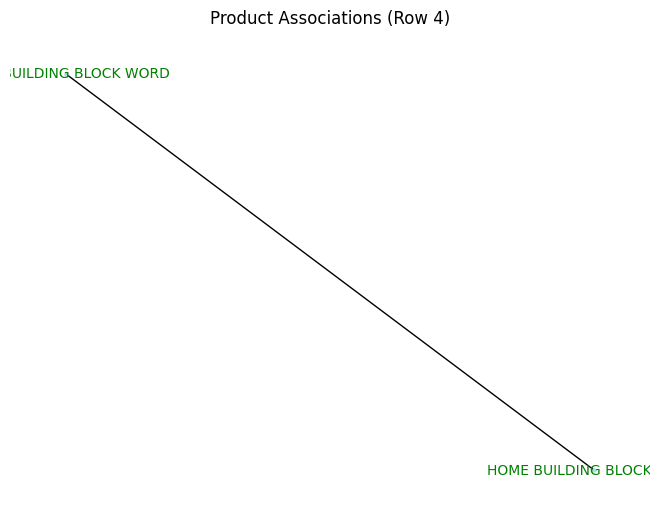

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 4
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()


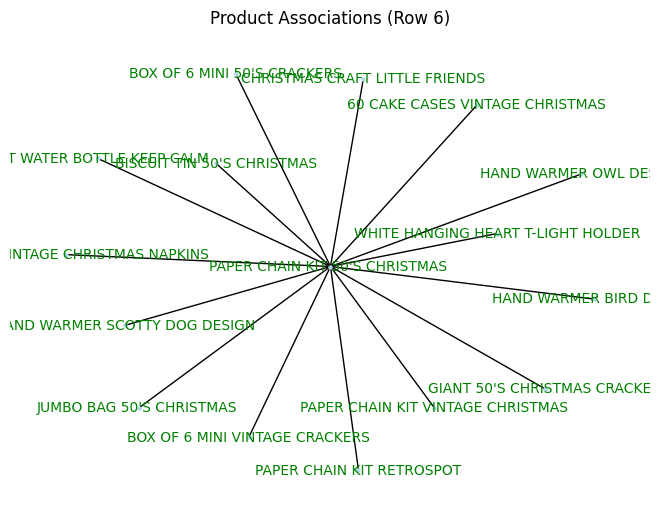

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 6
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [ ]:
pandas_df.iloc[12,1:]

Items         [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
prediction    [HAND WARMER OWL DESIGN, HAND WARMER SCOTTY DO...
Name: 12, dtype: object

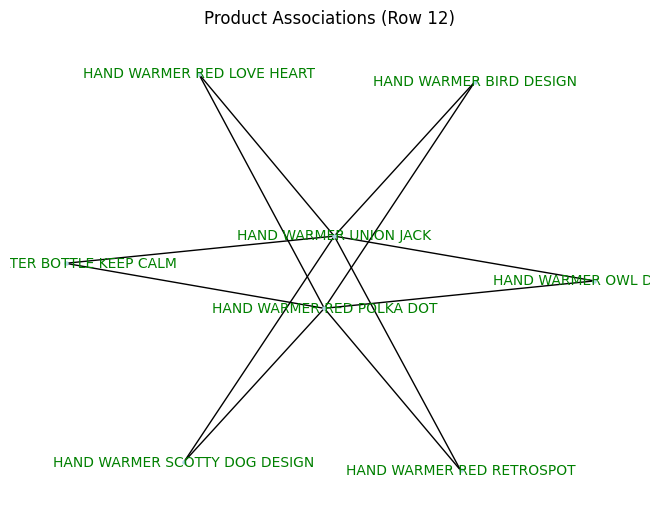

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 12
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [ ]:
rules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[FELTCRAFT GIRL N...|[FELTCRAFT GIRL A...| 0.7529411764705882| 54.73144175317186|0.006905481225722...|
|[JUMBO BAG ALPHAB...|[JUMBO BAG VINTAG...|0.47297297297297297|11.356252625682677|0.007552870090634...|
|[JUMBO BAG ALPHAB...|[JUMBO STORAGE BA...| 0.4155405405405405| 9.951498009637543|0.006635735865343116|
|[JUMBO BAG ALPHAB...|[JUMBO BAG PINK P...|0.46621621621621623| 9.921680578396996|0.007444971946482521|
|[JUMBO BAG ALPHAB...|  [JUMBO BAG APPLES]| 0.4864864864864865|12.559211021606565|0.007768666378938282|
|[SET OF 6 SNACK L...|[SET OF 6 TEA TIM...| 0.6683168316831684|38.833607498680905| 0.00728312473025464|
|[SET OF 6 SNACK L...|[SET OF 12 MINI L...| 0.7425742574257426|3

A lift value greater than 1 suggests a positive association, while a value less than 1 suggests a negative association.

LIFT: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent.

In [ ]:
min_lift = 1.5

filtered_lift_rules = rules.filter(rules.lift >= min_lift)

count = filtered_lift_rules.count()
print(rules.count())
print("Number of rules greater than the minimum lift: ", count)


3924
Number of rules greater than the minimum lift:  3884


 Confidence - the probability that the a item will be purchased when the other is present.

 since confidence is probability confidence greater than 0.7 would be good

In [ ]:
min_confidence = 0.7

filtered_confidence_rules = rules.filter(rules.confidence >= min_confidence)

count = filtered_confidence_rules.count()
print(rules.count())
print("Number of rules greater than the minimum confidence: ", count)

3924
Number of rules greater than the minimum confidence:  567


support: The support count, which represents how frequently the association rule occurs in the dataset.

Since data set is very large we can take the minimum support to 1%

In [ ]:
min_support = 0.01

filtered_support_rules = rules.filter(rules.support >= min_support)

count = filtered_support_rules.count()
print(rules.count())
print("Number of filtered rules based on support:", count)


3924
Number of filtered rules based on support: 761


In [ ]:
spark.stop()

#PIPELINE

LOAD DATA

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.fpm import FPGrowth
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F
from pyspark.sql.functions import desc
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MarketBasketAnalysisPipeline").getOrCreate()
df_1 =  spark.read.csv("/content/C:/Users/jyoth/Downloads/BDA PROJ/local_output.csv",header=True,inferSchema=True)
df_1

DataFrame[transaction_id: int, product_id: string, product_name: string, quantity: int, transaction_date: date, price: double, customer_id: int, country: string]

PRE PROCESS

In [ ]:
basketdata = df_1.dropDuplicates(['transaction_id', 'product_name']).sort('transaction_id')
basketdata = basketdata.groupBy("transaction_id").agg(F.collect_list("product_name")).sort('transaction_id')
basketdata = basketdata.withColumnRenamed("collect_list(product_name)", "Items")

FP GROWTH

In [ ]:
# Step 1: Define an FP-Growth model
fpGrowth = FPGrowth(itemsCol="Items", minSupport=0.006, minConfidence=0.006)

In [ ]:
# Step 2: Create a pipeline
pipeline = Pipeline(stages=[fpGrowth])

In [ ]:
# Step 3: Fit the pipeline to your data
model = pipeline.fit(basketdata)

In [ ]:
# Step 4: Get the transformed data
transformed = model.transform(basketdata)

# Step 5: Display results
transformed.show()

+--------------+--------------------+--------------------+
|transaction_id|               Items|          prediction|
+--------------+--------------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|[LARGE WHITE HEAR...|
|        536366|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536367|[ASSORTED COLOUR ...|[DOORMAT ENGLISH ...|
|        536368|[BLUE COAT RACK P...|[HOMEMADE JAM SCE...|
|        536369|[BATH BUILDING BL...|[HOME BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|[ALARM CLOCK BAKE...|
|        536371|[PAPER CHAIN KIT ...|[HAND WARMER OWL ...|
|        536372|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536373|[WOODEN FRAME ANT...|[WOOD BLACK BOARD...|
|        536374|[VICTORIAN SEWING...|                  []|
|        536375|[WOODEN PICTURE F...|[WOOD BLACK BOARD...|
|        536376|[HOT WATER BOTTLE...|[CANDLEHOLDER PIN...|
|        536377|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536378|[PACK OF 60 DINOS...|[GINGERBREAD MAN ..

In [ ]:
# Display frequent itemsets
model.stages[0].freqItemsets.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[12 COLOURED PART...| 139|
|[TRAVEL CARD WALL...| 205|
|[TRAVEL CARD WALL...| 119|
|[JUMBO BAG SCANDI...| 451|
|[JUMBO BAG SCANDI...| 112|
|[JUMBO BAG SCANDI...| 124|
|[JUMBO BAG SCANDI...| 128|
|[JUMBO BAG SCANDI...| 134|
|[JUMBO BAG SCANDI...| 122|
|[JUMBO BAG SCANDI...| 268|
|[JUMBO BAG SCANDI...| 134|
|[JUMBO BAG SCANDI...| 241|
|[JUMBO BAG SCANDI...| 159|
|[JUMBO BAG SCANDI...| 125|
|[JUMBO BAG SCANDI...| 126|
|[JUMBO BAG SCANDI...| 198|
|[JUMBO BAG SCANDI...| 143|
|[JUMBO BAG SCANDI...| 151|
|[JUMBO BAG SCANDI...| 113|
|[JUMBO BAG SCANDI...| 155|
+--------------------+----+
only showing top 20 rows



In [ ]:
sorted_data = model.stages[0].freqItemsets.sort(desc("freq"))
sorted_data.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[WHITE HANGING HE...|1971|
|[REGENCY CAKESTAN...|1704|
|[JUMBO BAG RED RE...|1600|
|     [PARTY BUNTING]|1380|
|[ASSORTED COLOUR ...|1375|
|[LUNCH BAG RED RE...|1288|
|[SET OF 3 CAKE TI...|1146|
|           [POSTAGE]|1100|
|[LUNCH BAG  BLACK...|1052|
|[PACK OF 72 RETRO...|1029|
|    [SPOTTY BUNTING]|1003|
|[LUNCH BAG SPACEB...| 988|
|[PAPER CHAIN KIT ...| 980|
|[NATURAL SLATE HE...| 967|
|[LUNCH BAG CARS B...| 966|
|[HEART OF WICKER ...| 961|
|[LUNCH BAG PINK P...| 931|
|[LUNCH BAG SUKI D...| 899|
|[JAM MAKING SET W...| 879|
|[ALARM CLOCK BAKE...| 877|
+--------------------+----+
only showing top 20 rows



Display association rules

In [ ]:
model.stages[0].associationRules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[FELTCRAFT GIRL N...|[FELTCRAFT GIRL A...| 0.7529411764705882| 54.73144175317186|0.006905481225722...|
|[JUMBO BAG ALPHAB...|[JUMBO BAG VINTAG...|0.47297297297297297|11.356252625682677|0.007552870090634...|
|[JUMBO BAG ALPHAB...|[JUMBO STORAGE BA...| 0.4155405405405405| 9.951498009637543|0.006635735865343116|
|[JUMBO BAG ALPHAB...|[JUMBO BAG PINK P...|0.46621621621621623| 9.921680578396996|0.007444971946482521|
|[JUMBO BAG ALPHAB...|  [JUMBO BAG APPLES]| 0.4864864864864865|12.559211021606565|0.007768666378938282|
|[SET OF 6 SNACK L...|[SET OF 6 TEA TIM...| 0.6683168316831684|38.833607498680905| 0.00728312473025464|
|[SET OF 6 SNACK L...|[SET OF 12 MINI L...| 0.7425742574257426|3

#HYPERPARAMETER TUNING

#1

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MarketBasketAnalysis1").getOrCreate()
df_1 =  spark.read.csv("/content/C:/Users/jyoth/Downloads/BDA PROJ/local_output.csv",header=True,inferSchema=True)
df_1

DataFrame[transaction_id: int, product_id: string, product_name: string, quantity: int, transaction_date: date, price: double, customer_id: int, country: string]

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F

In [ ]:
basketdata = df_1.dropDuplicates(['transaction_id','product_name']).sort('transaction_id')
original_data=basketdata
basketdata.show()
print((basketdata.count(), len(basketdata.columns)))

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536365|    84406B|CREAM CUPID HEART...|       8|      2010-12-01| 2.75|      17850|United Kingdom|
|        536365|     21730|GLASS STAR FROSTE...|       6|      2010-12-01| 4.25|      17850|United Kingdom|
|        536365|    84029G|KNITTED UNION FLA...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|    85123A|WHITE HANGING HEA...|       6|      2010-12-01| 2.55|      17850|United Kingdom|
|        536365|    84029E|RED WOOLLY HOTTIE...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|     22752|SET 7 BABUSHKA NE...|       2|      2010-12-01| 7.65|      17850|United Kingdom|
|        536365|     71053| 

In [ ]:
basketdata = basketdata.groupBy("transaction_id").agg(F.collect_list("product_name")).sort('transaction_id')
basketdata.show()

+--------------+--------------------------+
|transaction_id|collect_list(product_name)|
+--------------+--------------------------+
|        536365|      [SET 7 BABUSHKA N...|
|        536366|      [HAND WARMER UNIO...|
|        536367|      [ASSORTED COLOUR ...|
|        536368|      [BLUE COAT RACK P...|
|        536369|      [BATH BUILDING BL...|
|        536370|      [ROUND SNACK BOXE...|
|        536371|      [PAPER CHAIN KIT ...|
|        536372|      [HAND WARMER UNIO...|
|        536373|      [WOODEN FRAME ANT...|
|        536374|      [VICTORIAN SEWING...|
|        536375|      [WOODEN PICTURE F...|
|        536376|      [HOT WATER BOTTLE...|
|        536377|      [HAND WARMER UNIO...|
|        536378|      [PACK OF 60 DINOS...|
|        536380|      [JAM MAKING SET P...|
|        536381|      [GUMBALL MONOCHRO...|
|        536382|      [ANTIQUE GLASS DR...|
|        536384|      [ENAMEL FLOWER JU...|
|        536385|      [TRADITIONAL CHRI...|
|        536386|      [JUMBO BAG

In [ ]:
basketdata = basketdata.withColumnRenamed("collect_list(product_name)","Items")
basketdata.show()

+--------------+--------------------+
|transaction_id|               Items|
+--------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|
|        536366|[HAND WARMER UNIO...|
|        536367|[ASSORTED COLOUR ...|
|        536368|[BLUE COAT RACK P...|
|        536369|[BATH BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|
|        536371|[PAPER CHAIN KIT ...|
|        536372|[HAND WARMER UNIO...|
|        536373|[WOODEN FRAME ANT...|
|        536374|[VICTORIAN SEWING...|
|        536375|[WOODEN PICTURE F...|
|        536376|[HOT WATER BOTTLE...|
|        536377|[HAND WARMER UNIO...|
|        536378|[PACK OF 60 DINOS...|
|        536380|[JAM MAKING SET P...|
|        536381|[GUMBALL MONOCHRO...|
|        536382|[ANTIQUE GLASS DR...|
|        536384|[ENAMEL FLOWER JU...|
|        536385|[TRADITIONAL CHRI...|
|        536386|[JUMBO BAG RED RE...|
+--------------+--------------------+
only showing top 20 rows



In [ ]:
fpGrowth = FPGrowth(itemsCol="Items", minSupport=0.008, minConfidence=0.01)
model = fpGrowth.fit(basketdata)

In [ ]:
model.freqItemsets.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[JUMBO BAG SCANDI...| 451|
|[JUMBO BAG SCANDI...| 268|
|[JUMBO BAG SCANDI...| 241|
|[JUMBO BAG SCANDI...| 159|
|[JUMBO BAG SCANDI...| 198|
|[JUMBO BAG SCANDI...| 151|
|[JUMBO BAG SCANDI...| 155|
|[JUMBO BAG SCANDI...| 190|
|[JUMBO BAG SCANDI...| 153|
|[TRAVEL CARD WALL...| 205|
|[ALARM CLOCK BAKE...| 359|
|[ALARM CLOCK BAKE...| 220|
|[ALARM CLOCK BAKE...| 163|
|[ALARM CLOCK BAKE...| 180|
|[ALARM CLOCK BAKE...| 246|
|[SPACEBOY MINI BA...| 201|
|[BIRD HOUSE HOT W...| 154|
|[GINGERBREAD MAN ...| 554|
|[10 COLOUR SPACEB...| 242|
|[AREA PATROLLED M...| 374|
+--------------------+----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import desc

sorted_data = model.freqItemsets.sort(desc("freq"))
sorted_data.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[WHITE HANGING HE...|1971|
|[REGENCY CAKESTAN...|1704|
|[JUMBO BAG RED RE...|1600|
|     [PARTY BUNTING]|1380|
|[ASSORTED COLOUR ...|1375|
|[LUNCH BAG RED RE...|1288|
|[SET OF 3 CAKE TI...|1146|
|           [POSTAGE]|1100|
|[LUNCH BAG  BLACK...|1052|
|[PACK OF 72 RETRO...|1029|
|    [SPOTTY BUNTING]|1003|
|[LUNCH BAG SPACEB...| 988|
|[PAPER CHAIN KIT ...| 980|
|[NATURAL SLATE HE...| 967|
|[LUNCH BAG CARS B...| 966|
|[HEART OF WICKER ...| 961|
|[LUNCH BAG PINK P...| 931|
|[LUNCH BAG SUKI D...| 899|
|[JAM MAKING SET W...| 879|
|[ALARM CLOCK BAKE...| 877|
+--------------------+----+
only showing top 20 rows



In [ ]:
model.associationRules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[SET OF 6 SNACK L...|[SET OF 12 MINI L...| 0.7425742574257426|38.340825726026644|0.008092360811394044|
|[SET OF 6 SPICE T...|[RECIPE BOX PANTR...|0.22970903522205208|5.1423752136183065|0.008092360811394044|
|[SET OF 6 SPICE T...|[JAM MAKING SET W...|0.24808575803981622| 5.231533118345886|0.008739749676305567|
|[SET OF 6 SPICE T...|[SET OF 3 CAKE TI...| 0.4563552833078101| 7.381327688825103|0.016076823478636166|
|[LUNCH BAG APPLE ...|[LUNCH BAG VINTAG...|           0.471875| 14.65104690117253|0.008146309883470005|
|[LUNCH BAG APPLE ...|[LUNCH BAG SUKI D...|            0.63125|13.015406006674082| 0.01089771255934398|
|[LUNCH BAG APPLE ...|[LUNCH BAG RED RE...|             0.6375| 

Association rules describe relationships between items and can be used to understand how frequently items are purchased together and the strength of those associations.

1. antecedent: which are the items typically found together before a purchase.

2. consequent: which are the items that are likely to be purchased if the antecedent items are present.

3. confidence: This is the confidence value, which indicates the probability that the consequent will be purchased when the antecedent is present.

4. lift: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent. A lift value greater than 1 indicates a positive association.

5. support: The support count, which represents how frequently the association rule occurs in the dataset.

In [ ]:
rules = model.associationRules
model.transform(basketdata).show()

+--------------+--------------------+--------------------+
|transaction_id|               Items|          prediction|
+--------------+--------------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|[LARGE WHITE HEAR...|
|        536366|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536367|[ASSORTED COLOUR ...|[WHITE HANGING HE...|
|        536368|[BLUE COAT RACK P...|[JAM MAKING SET P...|
|        536369|[BATH BUILDING BL...|                  []|
|        536370|[ROUND SNACK BOXE...|[ALARM CLOCK BAKE...|
|        536371|[PAPER CHAIN KIT ...|[JUMBO BAG 50'S C...|
|        536372|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536373|[WOODEN FRAME ANT...|[LARGE WHITE HEAR...|
|        536374|[VICTORIAN SEWING...|                  []|
|        536375|[WOODEN PICTURE F...|[LARGE WHITE HEAR...|
|        536376|[HOT WATER BOTTLE...|[CANDLEHOLDER PIN...|
|        536377|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536378|[PACK OF 60 DINOS...|[SET OF 60 PANTRY..

In [ ]:
transformed = model.transform(basketdata)
transformed.show()

+--------------+--------------------+--------------------+
|transaction_id|               Items|          prediction|
+--------------+--------------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|[LARGE WHITE HEAR...|
|        536366|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536367|[ASSORTED COLOUR ...|[WHITE HANGING HE...|
|        536368|[BLUE COAT RACK P...|[JAM MAKING SET P...|
|        536369|[BATH BUILDING BL...|                  []|
|        536370|[ROUND SNACK BOXE...|[ALARM CLOCK BAKE...|
|        536371|[PAPER CHAIN KIT ...|[JUMBO BAG 50'S C...|
|        536372|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536373|[WOODEN FRAME ANT...|[LARGE WHITE HEAR...|
|        536374|[VICTORIAN SEWING...|                  []|
|        536375|[WOODEN PICTURE F...|[LARGE WHITE HEAR...|
|        536376|[HOT WATER BOTTLE...|[CANDLEHOLDER PIN...|
|        536377|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536378|[PACK OF 60 DINOS...|[SET OF 60 PANTRY..

In [ ]:
print((original_data.count(), len(original_data.columns)))
print((transformed.count(), len(transformed.columns)))

(387773, 8)
(18536, 3)


In [ ]:
import pandas as pd
pandas_df = transformed.toPandas()

In [ ]:
pandas_df

,transaction_id,Items,prediction
0,536365,"[SET 7 BABUSHKA NESTING BOXES, KNITTED UNION F...","[LARGE WHITE HEART OF WICKER, LUNCH BAG BLACK..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...","[HAND WARMER OWL DESIGN, HAND WARMER SCOTTY DO..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, IVORY KNITTED ...","[WHITE HANGING HEART T-LIGHT HOLDER, POPPY'S P..."
3,536368,"[BLUE COAT RACK PARIS FASHION, YELLOW COAT RAC...","[JAM MAKING SET PRINTED, REGENCY CAKESTAND 3 T..."
4,536369,[BATH BUILDING BLOCK WORD],[]
...,...,...,...
18531,581583,"[6 CHOCOLATE LOVE HEART T-LIGHTS, LUNCH BAG RE...","[JUMBO BAG SPACEBOY DESIGN, STRAWBERRY CHARLOT..."
18532,581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",[]
18533,581585,"[ALARM CLOCK BAKELIKE RED , ZINC T-LIGHT HOLDE...","[ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE..."
18534,581586,"[DOORMAT RED RETROSPOT, RED RETROSPOT ROUND CA...",[]


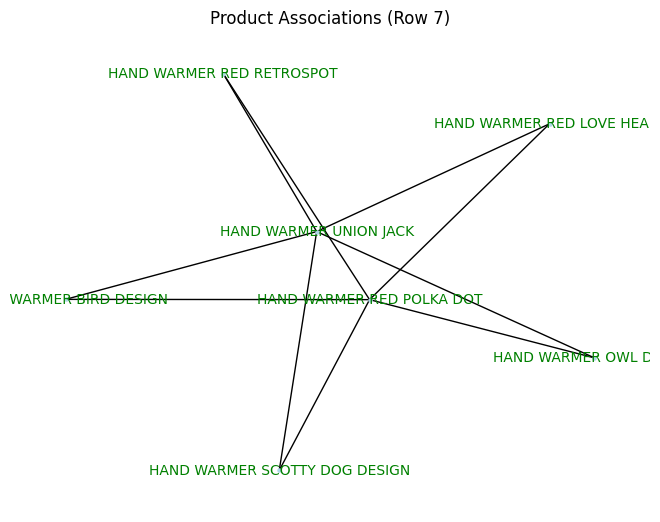

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 7
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()


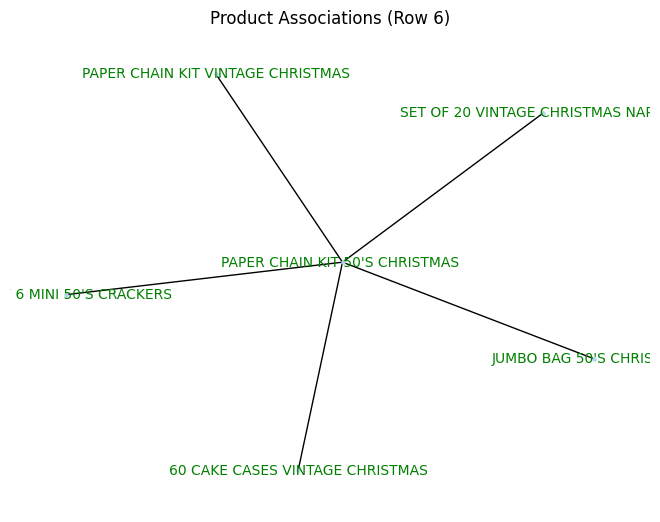

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 6
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [ ]:
pandas_df.iloc[12,1:]

Items         [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
prediction    [HAND WARMER OWL DESIGN, HAND WARMER SCOTTY DO...
Name: 12, dtype: object

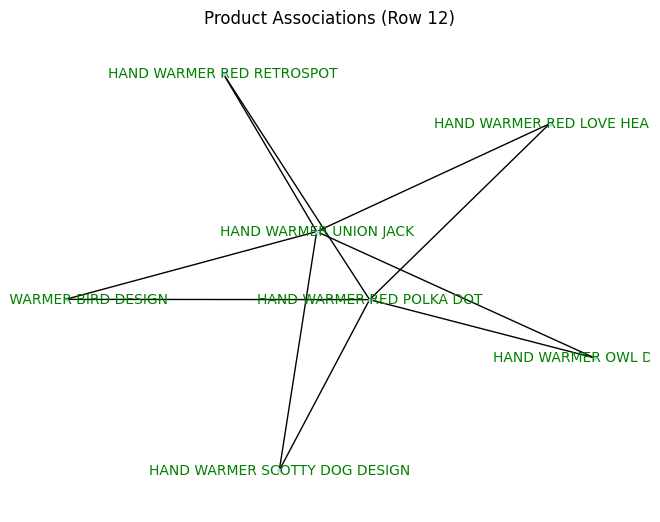

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 12
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [ ]:
rules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[SET OF 6 SNACK L...|[SET OF 12 MINI L...| 0.7425742574257426|38.340825726026644|0.008092360811394044|
|[SET OF 6 SPICE T...|[RECIPE BOX PANTR...|0.22970903522205208|5.1423752136183065|0.008092360811394044|
|[SET OF 6 SPICE T...|[JAM MAKING SET W...|0.24808575803981622| 5.231533118345886|0.008739749676305567|
|[SET OF 6 SPICE T...|[SET OF 3 CAKE TI...| 0.4563552833078101| 7.381327688825103|0.016076823478636166|
|[LUNCH BAG APPLE ...|[LUNCH BAG VINTAG...|           0.471875| 14.65104690117253|0.008146309883470005|
|[LUNCH BAG APPLE ...|[LUNCH BAG SUKI D...|            0.63125|13.015406006674082| 0.01089771255934398|
|[LUNCH BAG APPLE ...|[LUNCH BAG RED RE...|             0.6375| 

A lift value greater than 1 suggests a positive association, while a value less than 1 suggests a negative association.

LIFT: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent.

In [ ]:
min_lift = 1.5

filtered_lift_rules = rules.filter(rules.lift >= min_lift)

count = filtered_lift_rules.count()
print(rules.count())
print("Number of rules greater than the minimum lift: ", count)


1656
Number of rules greater than the minimum lift:  1650


 Confidence - the probability that the a item will be purchased when the other is present.

 since confidence is probability confidence greater than 0.7 would be good

In [ ]:
min_confidence = 0.7

filtered_confidence_rules = rules.filter(rules.confidence >= min_confidence)

count = filtered_confidence_rules.count()
print(rules.count())
print("Number of rules greater than the minimum confidence: ", count)

1656
Number of rules greater than the minimum confidence:  200


support: The support count, which represents how frequently the association rule occurs in the dataset.

Since data set is very large we can take the minimum support to 1%

In [ ]:
min_support = 0.01

filtered_support_rules = rules.filter(rules.support >= min_support)

count = filtered_support_rules.count()
print(rules.count())
print("Number of filtered rules based on support:", count)


1656
Number of filtered rules based on support: 761


In [ ]:
spark.stop()

#2.


In [ ]:
import pandas as pd
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("MyApp") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

df_1 =  spark.read.csv("/content/C:/Users/jyoth/Downloads/BDA PROJ/local_output.csv",header=True,inferSchema=True)
df_1

DataFrame[transaction_id: int, product_id: string, product_name: string, quantity: int, transaction_date: date, price: double, customer_id: int, country: string]

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F

In [ ]:
basketdata = df_1.dropDuplicates(['transaction_id','product_name']).sort('transaction_id')
original_data=basketdata
basketdata.show()
print((basketdata.count(), len(basketdata.columns)))

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536365|    84406B|CREAM CUPID HEART...|       8|      2010-12-01| 2.75|      17850|United Kingdom|
|        536365|     21730|GLASS STAR FROSTE...|       6|      2010-12-01| 4.25|      17850|United Kingdom|
|        536365|    84029G|KNITTED UNION FLA...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|    85123A|WHITE HANGING HEA...|       6|      2010-12-01| 2.55|      17850|United Kingdom|
|        536365|    84029E|RED WOOLLY HOTTIE...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|     22752|SET 7 BABUSHKA NE...|       2|      2010-12-01| 7.65|      17850|United Kingdom|
|        536365|     71053| 

In [ ]:
basketdata = basketdata.groupBy("transaction_id").agg(F.collect_list("product_name")).sort('transaction_id')
basketdata.show()

+--------------+--------------------------+
|transaction_id|collect_list(product_name)|
+--------------+--------------------------+
|        536365|      [SET 7 BABUSHKA N...|
|        536366|      [HAND WARMER UNIO...|
|        536367|      [ASSORTED COLOUR ...|
|        536368|      [BLUE COAT RACK P...|
|        536369|      [BATH BUILDING BL...|
|        536370|      [ROUND SNACK BOXE...|
|        536371|      [PAPER CHAIN KIT ...|
|        536372|      [HAND WARMER UNIO...|
|        536373|      [WOODEN FRAME ANT...|
|        536374|      [VICTORIAN SEWING...|
|        536375|      [WOODEN PICTURE F...|
|        536376|      [HOT WATER BOTTLE...|
|        536377|      [HAND WARMER UNIO...|
|        536378|      [PACK OF 60 DINOS...|
|        536380|      [JAM MAKING SET P...|
|        536381|      [GUMBALL MONOCHRO...|
|        536382|      [ANTIQUE GLASS DR...|
|        536384|      [ENAMEL FLOWER JU...|
|        536385|      [TRADITIONAL CHRI...|
|        536386|      [JUMBO BAG

In [ ]:
basketdata = basketdata.withColumnRenamed("collect_list(product_name)","Items")
basketdata.show()

+--------------+--------------------+
|transaction_id|               Items|
+--------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|
|        536366|[HAND WARMER UNIO...|
|        536367|[ASSORTED COLOUR ...|
|        536368|[BLUE COAT RACK P...|
|        536369|[BATH BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|
|        536371|[PAPER CHAIN KIT ...|
|        536372|[HAND WARMER UNIO...|
|        536373|[WOODEN FRAME ANT...|
|        536374|[VICTORIAN SEWING...|
|        536375|[WOODEN PICTURE F...|
|        536376|[HOT WATER BOTTLE...|
|        536377|[HAND WARMER UNIO...|
|        536378|[PACK OF 60 DINOS...|
|        536380|[JAM MAKING SET P...|
|        536381|[GUMBALL MONOCHRO...|
|        536382|[ANTIQUE GLASS DR...|
|        536384|[ENAMEL FLOWER JU...|
|        536385|[TRADITIONAL CHRI...|
|        536386|[JUMBO BAG RED RE...|
+--------------+--------------------+
only showing top 20 rows



In [ ]:
fpGrowth = FPGrowth(itemsCol="Items", minSupport=0.001, minConfidence=0.001)
model = fpGrowth.fit(basketdata)

In [ ]:
model.freqItemsets.show()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


Py4JError: ignored

In [ ]:
from pyspark.sql.functions import desc

sorted_data = model.freqItemsets.sort(desc("freq"))
sorted_data.show()

In [ ]:
model.associationRules.show()

Association rules describe relationships between items and can be used to understand how frequently items are purchased together and the strength of those associations.

1. antecedent: which are the items typically found together before a purchase.

2. consequent: which are the items that are likely to be purchased if the antecedent items are present.

3. confidence: This is the confidence value, which indicates the probability that the consequent will be purchased when the antecedent is present.

4. lift: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent. A lift value greater than 1 indicates a positive association.

5. support: The support count, which represents how frequently the association rule occurs in the dataset.

In [ ]:
rules = model.associationRules
model.transform(basketdata).show()

In [ ]:
transformed = model.transform(basketdata)
transformed.show()

In [ ]:
print((original_data.count(), len(original_data.columns)))
print((transformed.count(), len(transformed.columns)))

In [ ]:
import pandas as pd
pandas_df = transformed.toPandas()

In [ ]:
pandas_df

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 4
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 10
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [ ]:
pandas_df.iloc[12,1:]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 14
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [ ]:
rules.show()

A lift value greater than 1 suggests a positive association, while a value less than 1 suggests a negative association.

LIFT: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent.

In [ ]:
min_lift = 1.5

filtered_lift_rules = rules.filter(rules.lift >= min_lift)

count = filtered_lift_rules.count()
print(rules.count())
print("Number of rules greater than the minimum lift: ", count)


 Confidence - the probability that the a item will be purchased when the other is present.

 since confidence is probability confidence greater than 0.7 would be good

In [ ]:
min_confidence = 0.7

filtered_confidence_rules = rules.filter(rules.confidence >= min_confidence)

count = filtered_confidence_rules.count()
print(rules.count())
print("Number of rules greater than the minimum confidence: ", count)

support: The support count, which represents how frequently the association rule occurs in the dataset.

Since data set is very large we can take the minimum support to 1%

In [ ]:
min_support = 0.01

filtered_support_rules = rules.filter(rules.support >= min_support)

count = filtered_support_rules.count()
print(rules.count())
print("Number of filtered rules based on support:", count)


In [ ]:
spark.stop()

#COMPARISION

1. 3884,567,761
2. 1650,200,761
3.


In [ ]:
import pandas as pd
data = {
    "minSupport": [0.006, 0.008, 0.001],
    "minConfidence": [0.006, 0.1, 0.001],
    "lift count": [3884, 1650, 90],
    "confidence count": [567, 200, 70],
    "support count": [761, 761, 180]
}
df = pd.DataFrame(data)
print(df)

   minSupport  minConfidence  lift count  confidence count  support count
0       0.006          0.006        3884               567            761
1       0.008          0.100        1650               200            761
2       0.001          0.001          90                70            180
